# Load Libraries and Data for Energy Efficiency dataset

In [ ]:
# Import required libraries
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

from io import BytesIO
import requests

In [ ]:
# Bypass SSL verification
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
response = requests.get(url, verify=False)
data = pd.read_excel(BytesIO(response.content))

# Display the first few rows
data.head()

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
tf.config.threading.get_intra_op_parallelism_threads()

0

In [ ]:
print("Number of CPUs available:", os.cpu_count())

Number of CPUs available: 2


4 threads (2 CPUs × 2 threads per CPU) will be used during model training.

# Data Processing

In [ ]:
# Define features and target columns
features = data.drop(['Y1', 'Y2'], axis=1)  # Drop the target variables (Y1 and Y2)
target = data[['Y1', 'Y2']]  # These are the output variables (Energy Efficiency outputs)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

# # Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Building Model and Training

In [ ]:
# Build the MLP model using Keras
model = tf.keras.Sequential([
    Input(shape=(X_train.shape[1],)), # Explicit input layer
    Flatten(),                        # Flatten layer to handle input data
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(2, activation='linear')                   # Output layer with 2 neurons for Y1 and Y2
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 970 (3.79 KB)

 Trainable params: 970 (3.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 579.8497 - val_loss: 523.1083
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 425.5603 - val_loss: 404.8842
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 367.5498 - val_loss: 320.8452
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 277.5588 - val_loss: 258.2534
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 211.3539 - val_loss: 210.2577
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 188.2459 - val_loss: 176.6526
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 143.6704 - val_loss: 151.5470
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135.7128 - val_loss: 130.7057
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.6220 - val_loss: 112.8673
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.7280 - val_loss: 97.5089
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.7038 - val_loss: 85.2618
Epoch 12/20
20/20 ━━━━━━━━━━━━━━

# Evaluation

In [ ]:
# Evaluate the model on the validation data
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)

print(f"Mean Squared Error on Test Data: {mse}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error on Test Data: 9.991050922505675


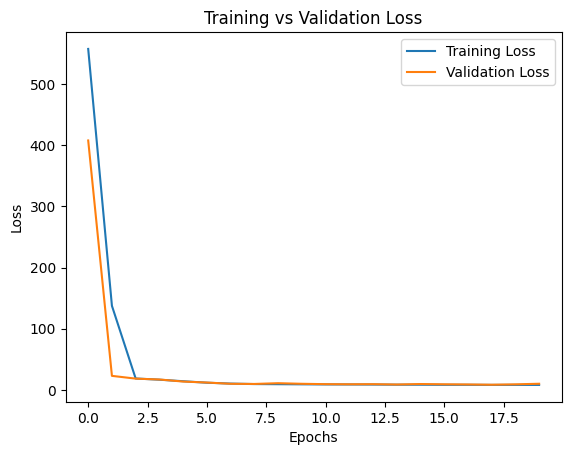

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Save Data in text format to use in C

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Bypass SSL verification
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
response = requests.get(url, verify=False)
df = pd.read_excel(BytesIO(response.content))

# Convert the DataFrame to a NumPy array
data = df.to_numpy()

# Prepare column labels
column_labels = df.columns.tolist()

# Verify data shape
print("Shape of the data array:", data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Shape of the data array: (768, 10)


In [ ]:
# Filepath to save on Google Drive
file_path = "/content/drive/My Drive/energy_efficiency_data.txt"

# Save data in txt format with header
with open(file_path, 'w') as file:
    # Write header information
    file.write("# Energy Efficiency Dataset\n")
    file.write("# Source: https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx\n")
    file.write("#\n")
    file.write("# Python code used to extract the data:\n")
    file.write("################################################################\n")
    python_code = """
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)

# Convert the DataFrame to a NumPy array
data = df.to_numpy()

# Prepare column labels
column_labels = df.columns.tolist()

# Verify data shape
print("Shape of the data array:", data.shape)

# Filepath to save on Google Drive
file_path = "/content/drive/My Drive/energy_efficiency_data.txt"

# Save data in txt format with header
with open(file_path, 'w') as file:
    # Write header information
    file.write("# Energy Efficiency Dataset\\n")
    file.write("# Source: https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx\\n")
    file.write("# Columns:\\n")
    file.write("# " + "\\t".join(column_labels) + "\\n")
    file.write("#" + "-" * 127 + "\\n")

    # Write the data with tab as delimiter
    np.savetxt(file, data, fmt='%s', delimiter="\\t")

print(f"Data saved to {file_path}")
"""
    # Add each line of the Python code to the file, prefixed with "#"
    for line in python_code.strip().split("\n"):
        file.write(f"# {line.strip()}\n")
    file.write("#\n")
    file.write("################################################################\n")
    file.write("#\n")
    file.write("# Columns:\n")
    file.write("# " + "\t".join(column_labels) + "\n")
    file.write("#" + "-" * 127 + "\n")

    # Write the data with tab as delimiter
    np.savetxt(file, data, fmt='%s', delimiter="\t")
